<h1><center>Assignment 4 </center></h1>
<h2><center> SC9502B </center></h2>
<h3><center> Yasamin Modabber </center></h3>
<h3><center>Student ID : 251390444<center><h3>
<link rel="stylesheet" type="text/css" href="./text.css">

1 . Write a Python code that performs the addition of two matrices A and B. Do not use any libraries
such as numpy. To demonstrate that your code works, use

$$
A=\left[\begin{array}{cccc}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12
\end{array}\right] \quad \text { and } \quad B=\left[\begin{array}{cccc}
-1 & 0 & 1 & 2 \\
3 & 4 & 5 & 6 \\
-7 & -8 & -9 & -10
\end{array}\right]
$$


For this question we define a function called Addition that first checks to see if the dimensions of the two matrices match, and if they do, it adds element $a[i][j]$ of matrix A with element $b[i][j]$ of matrix B.

In [2]:
def Addition(A,B):
    if len(A)!=len(B) or len(A[0])!=len(B[0]):
        return print("dimension mismatch")
    else:
        C=[]
        for i in range(len(A)):
            C.append([])
            for j in range(len(A[0])):
                C[i].append(A[i][j]+B[i][j])
    return C

# A function to print the matrices
def Print_result(C):
    for i in C:
        print(" ".join(str(j).rjust(3) for j in i))

#The example matrices
A=[[1,2,3,4],[5,6,7,8],[9,10,11,12]]
B=[[-1,0,1,2],[3,4,5,6,],[-7,-8,-9,-10]]

print(" Matrix A is: ")
Print_result(A)
print(" Matrix B is: ")
Print_result(B)
print("The Addition of these two Matrices, Matrix C is:")
Print_result(Addition(A,B))

 Matrix A is: 
  1   2   3   4
  5   6   7   8
  9  10  11  12
 Matrix B is: 
 -1   0   1   2
  3   4   5   6
 -7  -8  -9 -10
The Addition of these two Matrices, Matrix C is:
  0   2   4   6
  8  10  12  14
  2   2   2   2


2 . Modify the code from the previous problem to perform matrix multiplication without any libraries.
Then, write a second code that does the same with numpy. Instead of using the above matrices, use
randomly generated $ n × n $ matrices where $n$ is varied: plot the execution time vs n. Interpret the
results for the two codes.

For this question we write a function "Multiplication(A,B)" that recieves two input matrices A and B and performs matrix multiplication by looping through the indices.

We also write a function "generate_random_matrix(n)" that gets the size $n$ of the desired $n x n$ matrix as input and generates a matrix with random integers between -10 and 10 (can be changed).

In [3]:
import random

def generate_random_matrix(n):
    Matrix=[]
    for i in range(n):
        Matrix.append([])
        for j in range(n):
            Matrix[i].append(random.randint(-10,10))
    return Matrix

def Multiplication(A,B):
    if len(A[0])!=len(B):
        return print("dimension mismatch")
    else:
        C=[]
        for i in range(len(A)):
            C.append([])
            for j in range(len(A[0])):
                c=0
                for k in range(len(A[0])):
                    c += (A[i][k] * B[k][j])
                C[i].append(c)
    return C


We test the performance of the function by performing multiplication for two 5 x 5 matrices A and B:

In [4]:
n=5
A=generate_random_matrix(n)
B=generate_random_matrix(n)

print("Matrix A")
Print_result(A)
print("Matrix B")
Print_result(B)
print("Product of multiplication, Matrix C :")
Print_result(Multiplication(A,B))

Matrix A
  3   6   7   7  10
 -7   6   9  -4 -10
 -6   2   4   7  -1
  8   5   7  -1  -8
  0   1  -1  -3  -8
Matrix B
-10   1  -3   9   0
  8   5   0  -4  -8
  0   1   4  10   8
 -4  -2   8   5  -5
  9   3  -3  -3  10
Product of multiplication, Matrix C :
 80  56  45  78  73
 44  10  55  13 -56
 39  -9  93  16 -29
-108  18  20 141 -59
-52 -14  -4  -5 -81


We perform the multiplication with $matmul$ function in numpy:

In [5]:
import numpy as np

C_num = np.matmul(A,B)
print("Product of multiplication, Matrix C, using numpy :")
Print_result(C_num)

Product of multiplication, Matrix C, using numpy :
 80  56  45  78  73
 44  10  55  13 -56
 39  -9  93  16 -29
-108  18  20 141 -59
-52 -14  -4  -5 -81


Now we time the code for two methods of multiplication:

The function "evaluate_execution_time(func , size , iterations)" recieves the function, size of the arrays ($n$), and the number of iterations over which we average and calculate the execution time of the multiplications

In [6]:
import time

def evaluate_execution_time(func,size,iterations):
    A=generate_random_matrix(size)
    B=generate_random_matrix(size)
    start_time = time.time()
    for k in range(iterations): #performs multiplication several times
        result = func(A,B)
    end_time = time.time()
    execution_time = (end_time - start_time)/iterations #The averaged time is reported
    return execution_time

import matplotlib.pyplot as plt
range_n=np.arange(1,100)
ex_time_func=[]
ex_time_numpy=[]
for n in range_n:
    ex_time_func.append(evaluate_execution_time(Multiplication,size=n,iterations=100))
    ex_time_numpy.append(evaluate_execution_time(np.matmul , size=n , iterations=100))


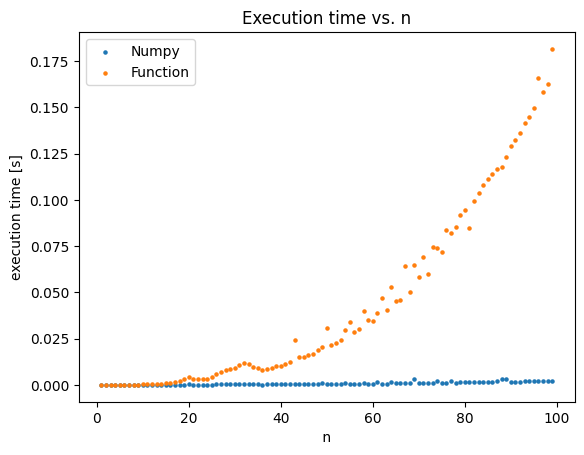

In [7]:
plt.ylabel("execution time [s]")
plt.xlabel(" n ")
plt.title("Execution time vs. n")
plt.scatter(range_n,ex_time_numpy,label="Numpy" , s=5)
plt.scatter(range_n,ex_time_func,label="Function" , s=5)
plt.legend()

We can see that for small values of n, the execution time of the multiplication using the two methods dosn't show much difference, but for bigger n, we see the execution time for the self-written function grows significnatly while the execution time of the multiplication performed by numpy dosn't show much change, reflecting the optimization done for numpy functions that ensures great performance.  

3 . Follow the lecture notes and write a code that performs singular value decomposition. You can use
library functions to complete the different steps as describe in lecture notes, except the ones that do a
direct SVD, such as numpy.linalg.svd.

The process of finding the SVD for a desired matrix A is as follows:

Step 1 : Diagonalize Matrix $S= A^{T} A$ to find the orthonormal basis ${v_1 , v_2 , v_3 , ...}$

In [19]:
# Lets perform SVD on the matrix A defined bellow:
A = np.array([[-4 , 6],[3 , 8]])
S = np.dot(np.transpose(A) , A)
eig_val, eig_vec = np.linalg.eig(S) #gives the eigen values and the normalized eigen vectors

Step 2: reorder the eigen values, so that $\lambda_1 > \lambda_2 > ... > \lambda_n$

For this, we write the function $Rearrange(value,vector)$ that reorders the eigen values and corresponding eigenvectors in ascending order:

In [20]:
import numpy as np

def Rearrange(value , vector):
    # For each eigenvalue in the array
    for i in range(len(value)):
        # If the current index doesn't hold the smallest value compared to the rest of the array
        if value[i]>np.min(value[i:]):
            # Swap the value of that index with the one holding the smallest value
            ind=i
            ind_min=i + np.argmin(value[i:])
            # For the vector array
            vector[ind] , vector[ind_min] = vector[ind_min] , vector[ind]
            # And the values array
            value[ind] , value[ind_min] = value[ind_min] , value[ind]
    return value , vector

eig_val , eig_vec = Rearrange( eig_val , eig_vec )

Step 3 : Let $\sigma_j = \sqrt{\lambda_j}$ , j= 1, 2, 3,...

In [31]:
Sigma=np.sqrt(eig_val)
Sig_v=np.diag(Sigma)

Step 4 : Define $\bar{u_i} = \frac{1}{\sigma_i} A \bar{v_i}$

In [22]:
u=[]
for i in range(len(eig_vec)):
    u.append( 1/Sigma[i] * np.matmul(A , np.transpose(eig_vec[i])) )
print(u)

[array([-0.8,  0.6]), array([0.6, 0.8])]


Step 5: Extend the set of vectors using the gram-shmidth process to find the orthonormal basis

In [23]:
u_space=[]
def gram_shmidth(vec_space):
    for i in range(len(vec_space)):
        u_ort=u[i]
        if i > 1 :
            for j in range(i):
                u_ort -= (np.matmul(u[i] , u_ort[j]))/(np.matmul(u_ort[j],u_ort[j])) * u_ort[j]
        u_space.append(u_ort)
    return(u_space)

u_space = gram_shmidth(u)
print(u)

[array([-0.8,  0.6]), array([0.6, 0.8])]


Step 6: Write the U,V, and $Sigma$ as defined above:

$A = U \Sigma V^{T} $

In [34]:
print("U:")
Print_result(np.transpose(u_space))

print("Sigma")
Print_result(Sig_v)

print("V:")
Print_result(np.transpose(eig_vec))

print("The original matrix A : U Sigma V^T")
print(np.matmul(np.transpose(u_space) , np.matmul(Sig_v,eig_vec)))

U:
-0.8 0.6000000000000001
0.6000000000000001 0.8
Sigma
5.0 0.0
0.0 10.0
V:
1.0 0.0
0.0 1.0
The original matrix A : U Sigma V^T
[[-4.  6.]
 [ 3.  8.]]
